# Customer Support Bot - Graph Visualization

This notebook demonstrates how to visualize the LangGraph workflow using Mermaid diagrams.

## Graph Structure

The customer support bot uses a **ReAct pattern** (Reasoning + Acting):

1. **Agent Node**: Receives customer message and decides whether to call tools or provide an answer
2. **Tools Node**: Executes the selected tools (knowledge base search, order lookup, etc.)
3. **Conditional Edges**: Control the flow between agent and tools
4. **Loop**: Continues until agent provides a final answer

## Visualization


In [1]:
# Import required modules
import sys
from pathlib import Path

# Add src to path
sys.path.insert(0, str(Path.cwd() / "src"))

from support_agent.agent import graph
from support_agent.tools import tools


## Graph Information


In [2]:
# Print graph structure information
print("📊 Graph Information:")
print("=" * 30)

graph_structure = graph.get_graph()
print(f"Nodes: {list(graph_structure.nodes.keys())}")
print(f"Edges: {len(graph_structure.edges)}")

print("\n🔧 Available Tools:")
for tool in tools:
    print(f"  • {tool.name}: {tool.description}")


📊 Graph Information:
Nodes: ['__start__', 'agent', 'tools', '__end__']
Edges: 4

🔧 Available Tools:
  • search_knowledge_base: Search the store's knowledge base for information about policies, products, and FAQ.

    Use this tool to find answers about:
    - Store policies (returns, shipping, warranties)
    - Product information and features
    - Payment methods and security
    - General customer service questions

    Args:
        query: The customer's question or search terms
        category: Type of information needed. Options:
                 - "product": Product features, specifications, warranties
                 - "shipping": Delivery times, shipping costs, tracking
                 - "return": Return policies, refund process, exchanges
                 - "payment": Payment methods, security, billing
                 - "general": Other questions

    Returns:
        Relevant information from the knowledge base
  • search_vector_knowledge_base: Advanced vector search acr

## Visual Graph Representation


🎨 Generating graph visualization...


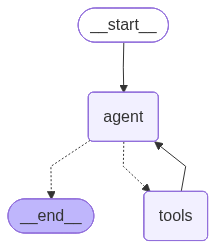

✅ Graph visualization displayed above!


In [3]:
# Generate and display the graph visualization
from IPython.display import Image, display

try:
    print("🎨 Generating graph visualization...")
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
    print("✅ Graph visualization displayed above!")
    
except Exception as e:
    print(f"❌ Error generating visualization: {e}")
    print("\n🔧 This requires some extra dependencies:")
    print("  pip install ipython pillow")
    print("  pip install 'langgraph[visualization]'")
    
    # Fallback: Show text representation
    print("\n📋 Graph Structure (Text):")
    print("""
    START
      ↓
   [AGENT] ← Reasoning step: decide to call tools or answer
      ↓
   {should_continue?}
     ↙        ↘
 [TOOLS]    [END]
    ↓
 [AGENT] ← Loop back with tool results
    """)
